In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [5]:
from scipy.special import erf
from scipy.integrate import quad
from numpy import pi, sqrt, exp

In [6]:
# r =4;R=5

In [7]:
# def gaussian_integ_sphere_indef(r, R):
#     return np.sqrt(pi)/sqrt(2)* ( erf((r - R)/sqrt(2)) + erf((r + R)/sqrt(2)) ) - ( (exp(-1/2 *(r - R)**2) - exp(-1/2 *(r + R)**2))) /R

In [8]:
def gaussian_integ_sphere_indef(Rad, prtcl_pos_r, h=1):
    Rad_h = Rad/h
    pos_r_h = prtcl_pos_r/h
    r, R = np.meshgrid(Rad_h, pos_r_h, copy=False)
    ans = ( erf((r - R)/sqrt(2)) + erf((r + R)/sqrt(2)) ) /2 - ( (exp(-1/2 *(r - R)**2) - exp(-1/2 *(r + R)**2)) ) /sqrt(2*pi)/R
    return ans.squeeze()

In [9]:
def gaussian_integ_sphere_defab(a,b):
    return gaussian_integ_sphere_indef(a)-gaussian_integ_sphere_indef(b)

In [10]:
pos_r = np.random.rand(10000)*15
pos_r = np.ones(10000)*5
Rad_bin = np.linspace(0,10)

In [26]:
r, R = np.meshgrid(Rad_bin, pos_r, copy=False)

In [12]:
# r.squeeze().shape

In [13]:
%time ans= gaussian_integ_sphere_indef(Rad_bin,pos_r)

Wall time: 159 ms


In [14]:
sqrt(pi*2)

2.5066282746310002

In [15]:
ans[0]

array([0.00000000e+00, 9.21709647e-09, 9.48089423e-08, 4.63650781e-07,
       1.71873773e-06, 5.48040837e-06, 1.57754851e-05, 4.19368337e-05,
       1.04241787e-04, 2.44116753e-04, 5.41280654e-04, 1.14034198e-03,
       2.28856350e-03, 4.38414803e-03, 8.03006952e-03, 1.40824111e-02,
       2.36756872e-02, 3.82032493e-02, 5.92318747e-02, 8.83388161e-02,
       1.26877548e-01, 1.75702180e-01, 2.34903164e-01, 3.03619545e-01,
       3.79987995e-01, 4.61263718e-01, 5.44108129e-01, 6.24994671e-01,
       7.00651656e-01, 7.68450968e-01, 8.26667227e-01, 8.74567872e-01,
       9.12337996e-01, 9.40880646e-01, 9.61553732e-01, 9.75905498e-01,
       9.85455783e-01, 9.91547760e-01, 9.95272959e-01, 9.97456729e-01,
       9.98684016e-01, 9.99345290e-01, 9.99686897e-01, 9.99856095e-01,
       9.99936447e-01, 9.99973035e-01, 9.99989009e-01, 9.99995697e-01,
       9.99998382e-01, 9.99999416e-01])

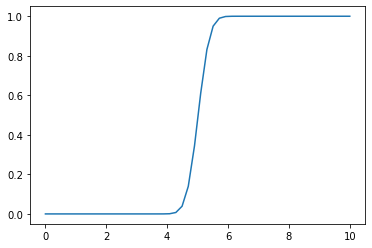

In [16]:
plt.plot(Rad_bin, gaussian_integ_sphere_indef(Rad_bin,5,.3))

In [17]:
gaussian_integ_sphere_indef(6, 5)

array(0.7929506)

In [18]:
erf(-10)

-1.0

In [19]:
def I_rad(r,R):
    return 1/sqrt(2*pi) * ( (exp(-1/2 * (r - R)**2) * r)/R - (exp(-1/2 * (r + R)**2) * r)/R )

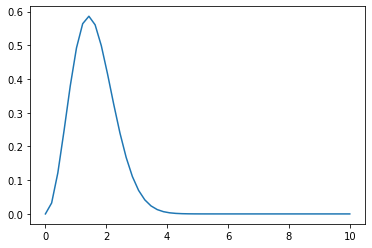

In [22]:
plt.plot(Rad_bin, I_rad(Rad_bin,0.1))

In [23]:
# for R in np.linspace(0.01,15):
#     print( R, quad(I_rad, 0,10, args=R) )

In [24]:
ans[0,1:]-ans[0,:-1]

array([9.21709647e-09, 8.55918458e-08, 3.68841839e-07, 1.25508695e-06,
       3.76167065e-06, 1.02950767e-05, 2.61613486e-05, 6.23049532e-05,
       1.39874966e-04, 2.97163901e-04, 5.99061327e-04, 1.14822152e-03,
       2.09558453e-03, 3.64592148e-03, 6.05234155e-03, 9.59327612e-03,
       1.45275621e-02, 2.10286255e-02, 2.91069414e-02, 3.85387317e-02,
       4.88246320e-02, 5.92009838e-02, 6.87163813e-02, 7.63684500e-02,
       8.12757226e-02, 8.28444113e-02, 8.08865418e-02, 7.56569851e-02,
       6.77993123e-02, 5.82162589e-02, 4.79006454e-02, 3.77701232e-02,
       2.85426502e-02, 2.06730858e-02, 1.43517666e-02, 9.55028494e-03,
       6.09197664e-03, 3.72519876e-03, 2.18377006e-03, 1.22728719e-03,
       6.61274452e-04, 3.41607084e-04, 1.69197499e-04, 8.03515830e-05,
       3.65880313e-05, 1.59748834e-05, 6.68805258e-06, 2.68493421e-06,
       1.03358859e-06])

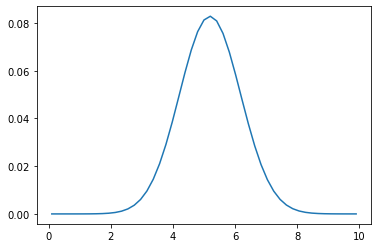

In [27]:
plt.plot((r[0,1:]+r[0,:-1])/2, ans[0,1:]-ans[0,:-1])